KMO Test Score: 0.543


/home/andres/PhD/chapter_I-biogeography/python/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


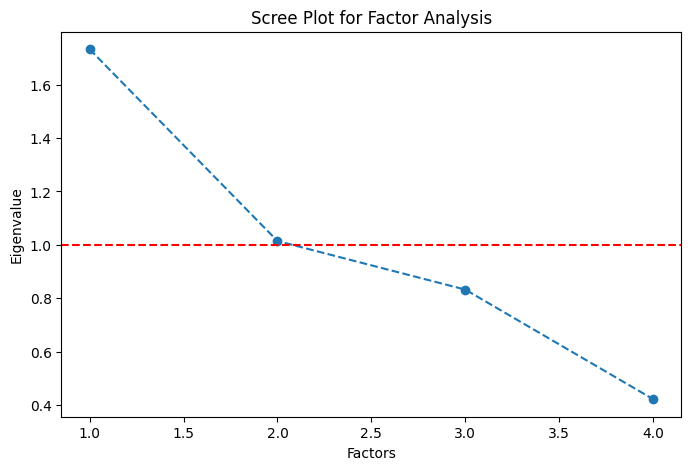

Factor Loadings:
                       Factor 1  Factor 2
EWMnino               0.936209  0.066093
EWMnina               0.545174  0.589811
primaryLoss_rate     -0.010890 -0.315214
PrimaryLoss_Fires50% -0.287908 -0.053826


/home/andres/PhD/chapter_I-biogeography/python/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


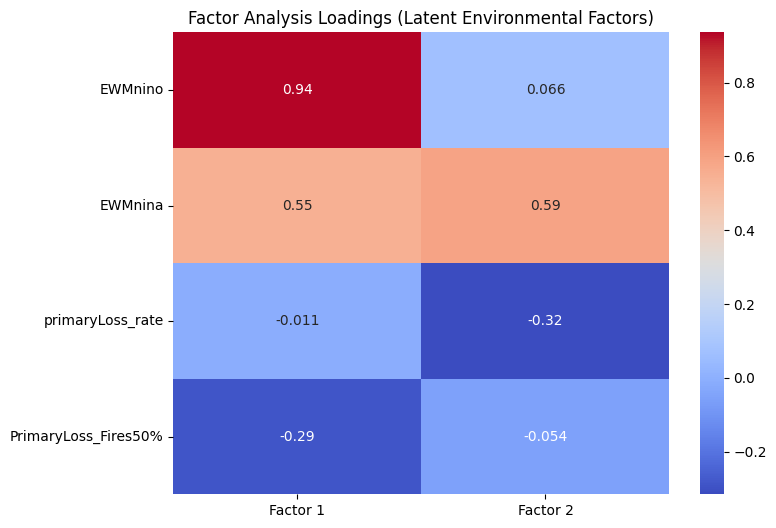

In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, calculate_kmo

# Example usage
path_gpkg = "outputs/geopackages/ZonalStat_Ecoregions_EWM_v2.gpkg"
layer_name = "zonal_statistics_v2"

# Load the GeoPackage file
ecoregions_gdf = gpd.read_file(path_gpkg, layer=layer_name)

# Convert to pandas DataFrame and set ECO_ID as index
df = pd.DataFrame(ecoregions_gdf)
df.set_index("ECO_ID", inplace=True)  # Ensure ECO_ID is the index

# Select relevant columns
selected_columns = [
    "EWMnino",
    "EWMnina",
    "primaryLoss_rate",
    "PrimaryLoss_Fires50%"
]
# ✅ Step 2: Select the relevant columns for FA (same ones used in PCA)
selected_columns = ["EWMnino", "EWMnina", "primaryLoss_rate", "PrimaryLoss_Fires50%"]
df_selected = df[selected_columns].dropna()  # Remove NaNs

# ✅ Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# ✅ Step 3: Determine the optimal number of factors using Kaiser-Meyer-Olkin (KMO)
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"KMO Test Score: {kmo_model:.3f}")  # Should be >0.6 for good FA

# ✅ Step 4: Check Eigenvalues to determine the number of factors
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(df_scaled)
eigenvalues, _ = fa.get_eigenvalues()

# Plot eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker="o", linestyle="--")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot for Factor Analysis")
plt.axhline(y=1, color="r", linestyle="--")  # Kaiser criterion
plt.show()

# ✅ Step 5: Apply Factor Analysis (Choose 2 or 3 factors based on eigenvalues)
fa = FactorAnalyzer(n_factors=2, rotation="varimax")  # Adjust factors based on scree plot
fa.fit(df_scaled)

# ✅ Get Factor Loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=selected_columns, columns=["Factor 1", "Factor 2"])
print("Factor Loadings:\n", factor_loadings)

# ✅ Step 6: Visualize Factor Loadings
plt.figure(figsize=(8, 6))
sns.heatmap(factor_loadings, cmap="coolwarm", annot=True)
plt.title("Factor Analysis Loadings (Latent Environmental Factors)")
plt.show()
